# PRISM raw (4-km) fields visualization

In [1]:
# general tools
import sys
from glob import glob
from os.path import basename
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np


# graph tools
import matplotlib.pyplot as plt
%matplotlib inline

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
import data_utils as du
from namelist import * 

# NRT fields

In [2]:
def prism_example(var, ind=180):
    '''
    Extracting a single slice from raw PRISM
    '''
    filename = PRISM_dir+'PRISM_{}_2015_2020.hdf'.format(var)

    with h5py.File(filename, 'r') as hdf_io:
        #print(hdf_io.keys())
        VAR = hdf_io['PRISM_{}'.format(var)][ind, ...] # single slice
        lon = hdf_io['lon'][...]
        lat = hdf_io['lat'][...]
    return lon, lat, VAR

**TMAX**

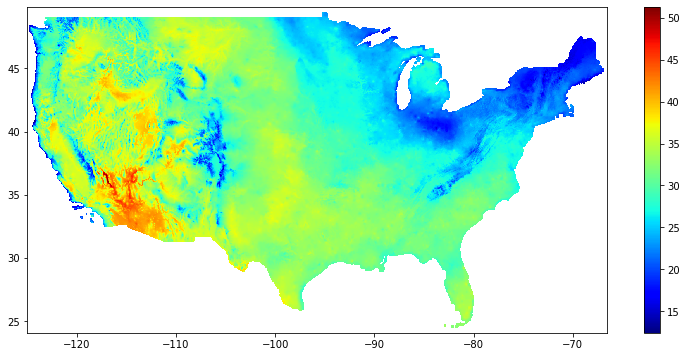

In [15]:
lon, lat, TMAX = prism_example('TMAX', ind=180)

fig = plt.figure(figsize=(13, 6))
ax = fig.gca()
CS = ax.pcolormesh(lon, lat, TMAX, cmap=plt.cm.jet)
plt.colorbar(CS)

**PCT**

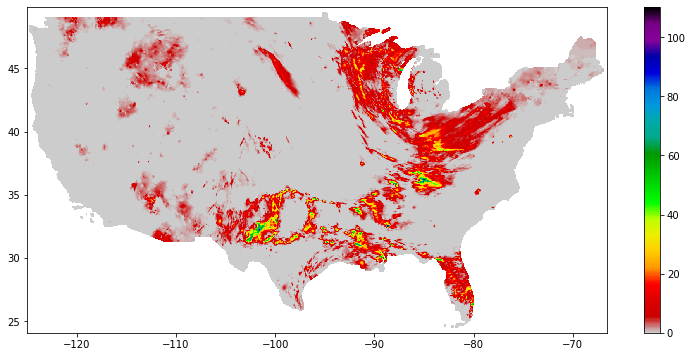

In [17]:
lon, lat, PCT = prism_example('PCT', ind=180)

fig = plt.figure(figsize=(13, 6))
ax = fig.gca()
CS = ax.pcolormesh(lon, lat, PCT, cmap=plt.cm.nipy_spectral_r)
plt.colorbar(CS)

# Training batches

**TMAX**

In [47]:
batch_names = glob(BATCH_dir+'TMAX*64*.npy')[:10] # grab 10 files

In [57]:
batch_names[0]

'/glade/scratch/ksha/DATA/PRISM_dscale/TMAX_BATCH_64_TORI_djf61.npy'

In [18]:
temp_data = np.load('/glade/scratch/ksha/DATA/PRISM_dscale/TMAX_BATCH_64_TORI_djf61.npy', allow_pickle=True)
X = temp_data[()]['batch'][...]
#Y = temp_data[()]['Y'][...]

In [19]:
np.min(X[t, ..., 0])

-4.6945426361667995

In [20]:
np.min(X[t, ..., 1])

-2.0046413116486486

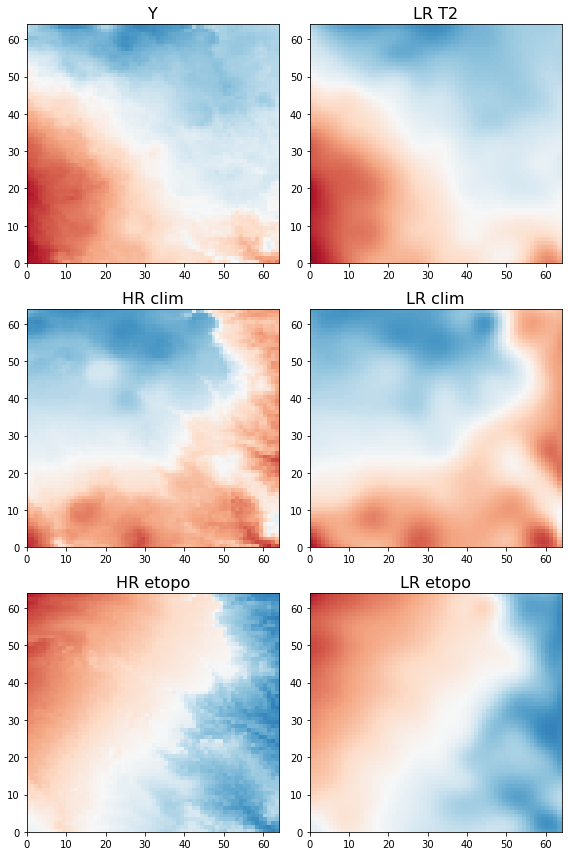

In [23]:
t = 78
fig, AX = plt.subplots(3, 2, figsize=(8, 12)); AX = AX.ravel()

titles = ['Y', 'LR T2', 'HR clim', 'LR clim', 'HR etopo', 'LR etopo']
for i, ax in enumerate(AX):
    ax.pcolormesh(X[t, ..., i], vmin=-3, vmax=3, cmap=plt.cm.RdBu_r)
    ax.set_title(titles[i], fontsize=16)
    
plt.tight_layout()

**PCT**

In [16]:
batch_names = glob(BATCH_dir+'PCT*.npy')[:10] # grab 10 files

In [17]:
temp_data = np.load(batch_names[0], allow_pickle=True)
X = temp_data[()]['X'][...]
Y = temp_data[()]['Y'][...]

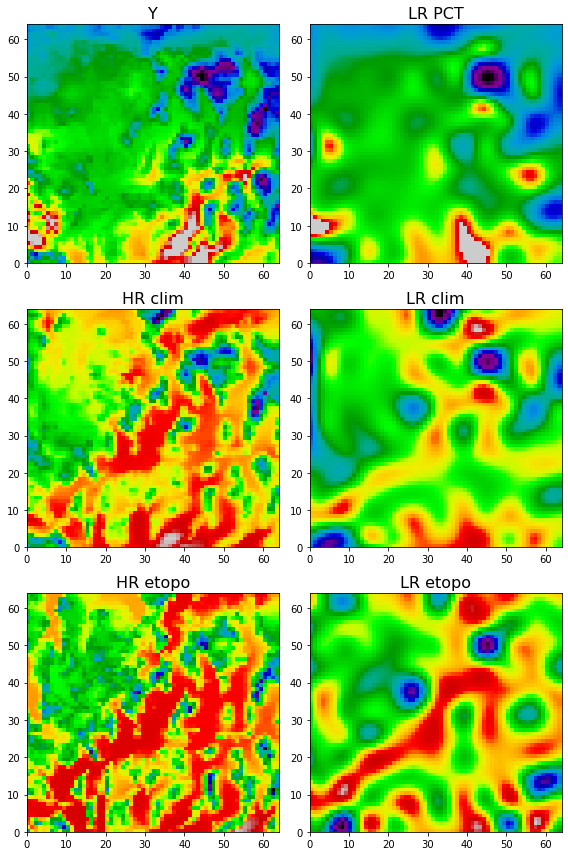

In [21]:
t = 0
fig, AX = plt.subplots(3, 2, figsize=(8, 12)); AX = AX.ravel()

AX[0].pcolormesh(Y[t, ...], vmin=0, vmax=1, cmap=plt.cm.nipy_spectral_r)
for i, ax in enumerate(AX[1:]): 
    ax.pcolormesh(X[t, ..., i], vmin=0, vmax=1, cmap=plt.cm.nipy_spectral_r)

titles = ['Y', 'LR PCT', 'HR clim', 'LR clim', 'HR etopo', 'LR etopo']
for i, ax in enumerate(AX):
    ax.set_title(titles[i], fontsize=16)
    
plt.tight_layout()

In [46]:
'a' in ['a', 'b', 'c']

True